# Определение перспективного тарифа для телеком-компании

В настоящее время, реклама — один из самых эффективных инструментов продвижения бизнеса и способ повышения продаж. В тоже время, нерациональное планирование рекламных кампаний и маркетингового бюджета приведет к генерации затрат, а не выручки.

Компании "Мегалайн", федеральному оператору сотовой связи, требуется спланировать рекламный бюджет на следующий год. Для этого необходимо определить, какой из двух тарифных планов: «Смарт» или «Ультра» приносять компании большую прибыль.

На основе данных за 2018 год изучим поведение пользователей обоих тарифов: сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц. Рассчитаем помесячную выручку с каждого пользователя. Проверим, различается ли средняя выручка пользователей тарифов «Ультра» и «Смарт», пользователей из Москвы и других регионов.

**Цель исследования**: определить, какой из двух тарифов приносит больше денег компании.

**Ход исследования**

Данные для исследования получим из файлов `calls.csv`, `internet.csv`, `messages.csv`, `tariffs.csv`, `users.csv`. Известно, что данные являются выборкой и содержат информацию лишь о 500 клиентах сотового оператора.
 
Исследование пройдет в четыре этапа:
 1. Изучение данных.
 2. Предобработка данных.
 3. Ислледовательский анализ.
 4. Проверка гипотез.

## Изучение данных из файлов

Составим первое впечатление о входных данных. Для начала импортируем библиотеки `pandas`, `numpy`, `seaborn` и `stats`: они нам понадобятся в работе.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats as st
import warnings

Прочитаем файлы `calls.csv`, `internet.csv`, `messages.csv`, `tariffs.csv`, `users.csv` из каталога `datasets` и сохраним их в одноименных переменных.

In [2]:
calls = pd.read_csv('/datasets/calls.csv')
internet = pd.read_csv('/datasets/internet.csv')
messages = pd.read_csv('/datasets/messages.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')
users = pd.read_csv('/datasets/users.csv')

Ознакомимся с составом каждой таблицы: для этого поочередно выведем на экран первые десять строк таблицы, а затем получим общую информацию методом `info()`.

In [3]:
calls.head(10)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


Согласно пояснению к данным, длительность звонков, равная нулю, это не ошибка, а пропущенные звонки.

In [4]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


Итак, в таблице 4 столбца:
* `id` — уникальный номер звонка;
* `call_date` — дата звонка;  
* `duration` — длительность звонка в минутах;
* `user_id` — идентификатор пользователя, сделавшего звонок.

Пропусков в таблице нет, но столбец `call_date` следует привести к формату `datetime`. Выполним это на этапе предобработки данных.

Ознакомимся с таблицей `internet`.

In [5]:
internet.head(10)

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
5,5,1000_5,399.97,2018-10-02,1000
6,6,1000_6,540.08,2018-09-07,1000
7,7,1000_7,415.70,2018-07-11,1000
8,8,1000_8,505.40,2018-10-08,1000
9,9,1000_9,345.54,2018-09-03,1000


Получим общую информацию о таблице.

In [6]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


Таблица `internet` состоит из 5 столбцов:
* `Unnamed: 0` — индекс записи в таблице;
* `id` — уникальный номер сессии;
* `mb_used` — объём потраченного за сессию интернет-трафика (в мегабайтах);  
* `session_date` — дата интернет-сессии;
* `user_id` — идентификатор пользователя.

Cтолбец `Unnamed` не содержит информации, необходимой для проведения исследования. Для экономии данных удалим его на этапе предобработки данных.

Рассмотрим таблицу `messages`.

In [7]:
messages.head(10)

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


Отобразим общую информацию о таблице методом `info()`.

In [8]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


В таблице три столбца:
* `id` — уникальный номер сообщения;
* `message_date` — дата сообщения;
* `user_id` — идентификатор пользователя, отправившего сообщение.  

Столбец `message_date` приведем к формату `datetime` на этапе предобработки данных.

Перейдем к таблице `tariffs`: выведем на экран первые 10 строк.

In [9]:
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


В таблице два тарифа: `smart` и `ultra`. Значения в столбце `mb_per_month_included` указаны в мегабайтах. Так как общий веб-трафик рассчитывается в гигабайтах, приведем значения к нужной единице измерения на этапе предобработки данных.

In [10]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


Таблица состоит из 8 столбцов:
* `messages_included` — количество сообщений в месяц, включённых в абонентскую плату;
* `mb_per_month_included` — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах);
* `minutes_included` — количество минут разговора в месяц, включённых в абонентскую плату;
* `rub_monthly_fee` — ежемесячная абонентская плата в рублях;
* `rub_per_gb` — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта).
* `rub_per_message` — стоимость отправки сообщения сверх тарифного пакета;
* `rub_per_minute` — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата);
* `tariff_name` — название тарифа;

Рассмотрим последнюю таблицу `users`.

In [11]:
users.head(10)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


Поолучим общую информацию о таблице.

In [12]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


В таблице `users` восемь столбцов:
* `user_id` — уникальный идентификатор пользователя;
* `age` — возраст пользователя (годы);
* `churn_date` — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных);
* `city` — город проживания пользователя;
* `first_name` — имя пользователя;
* `last_name` — фамилия пользователя;
* `reg_date` — дата подключения тарифа (день, месяц, год);
* `tariff` — название тарифного плана.

### Выводы

В нашем распоряжении 5 таблиц. `tariffs` содержит данные о двух тарифах оператора `smart` и `ultima`: размер абонентской платы, включенные в тариф опции и стоимость за их превышение. Таблица `users` включает данные о клиентах, в том числе используемый ими тариф. Колонка `user_id` таблицы является также ключом для трех оставшихся таблиц `calls`, `internet` и `messages`, по которому можно судить об активности пользователя.

Предварительно можно утверждать, что, данных достаточно для проведения исследования, однако встречаются колонки с некорректным типом данных и столбец с неподходящей единицей измерения.

Чтобы двигаться дальше, нужно устранить проблемы в данных.

## Предобработка данных

Приведем значения столбцов `call_date`, `session_date`, `message_date`, `churn_date`, `reg_date` к формату `datetime`.

In [13]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')

Для экономии данных удалим столбец с индексами из таблицы `internet`.

In [14]:
internet = internet.drop(columns='Unnamed: 0')

Переведем значения веб-трафика, указанные в таблице тарифов из мегабайтов в гигабайты, разделив значение столбца `mb_per_month_included` на 1024. Полученное значение сохраним в столбце `gb_per_month_included`.

In [15]:
tariffs['gb_per_month_included'] = (tariffs['mb_per_month_included'] / 1024).astype(int)

В таблице с интернет-трафиком присутствует много нулевых значений в столбце `mb_used`. Такие значения можно интерпретировать разными способами: технические неполадки при попытке входа в интернет или сессии, не расходующие дополнительный веб-трафик, как например, сайты государственных служб или сервисы, трафик с которых уже включен в стоимость тарифа (мессенджеры, сосцети).

Строки с нулевым значением трафика не несут информации, необходимой в исследовании, поэтому избавимся от них.

In [16]:
internet = internet.loc[internet['mb_used'] > 0]

### Выводы

Иправив тип данных столбцов и приведя значения веб-трафика к нужной единицей измерения, мы сделаем наше исследование более точным. 

Теперь можно перейти к расчетам и проверке гипотез. 

## Расчеты и создание сводной таблицы

Для каждого пользователя определим количество совершенных звонков, отправленных сообщений и израсходованного интернет-трафика по месяцам. Для удобства группировки в каждой таблице выделим месяц операции в отдельный столбец.

In [17]:
calls['month'] = calls['call_date'].dt.month
internet['month'] = internet['session_date'].dt.month
messages['month'] = messages['message_date'].dt.month

Согласно пояснению к данным, плата за звонки снимается поминутно, причем неполная минута округляется до целой в большую сторону. Выполним округление значений столбца `duration` таблицы `calls`.

In [18]:
calls['duration'] = np.ceil(calls['duration'])

Сгруппируем данные в таблицах `calls`, `internet`, `messages` по пользователю и месяцу операции с помощью функции `pivot_table()`.

In [19]:
calls_by_user = calls.pivot_table(values='duration', index=('user_id', 'month'), aggfunc='sum')
internet_by_user = internet.pivot_table(values='mb_used', index=('user_id', 'month'), aggfunc='sum')
messages_by_user = messages.pivot_table(values='id', index=('user_id', 'month'), aggfunc='count')

Совокупный интернет-трафик пользователя за месяц переведем в гигабайты, округляя в большую сторону.

In [20]:
internet_by_user = np.ceil(internet_by_user / 1024)

Создадим сводную таблицу с информацией о количестве потраченных минут, гигабайтов трафика и отправленных смс для каждого пользователя помесячно.

In [21]:
svod_table = calls_by_user.join(internet_by_user, how='outer').join(messages_by_user, how='outer').reset_index()

Переименуем столбцы сводной таблицы с помощью функции `rename()`.

In [22]:
svod_table = svod_table.rename(columns={'duration': 'minutes_called', 'mb_used': 'gb_used', 'id': 'messages_sent'})

Пустые значения, появившиеся при объединении таблиц заполним нулями, это значит, что клиент не пользовался этими услугами в текущем месяце.

In [23]:
svod_table[['minutes_called', 'gb_used', 'messages_sent']] = svod_table[['minutes_called', 'gb_used', 'messages_sent']].fillna(0)

Добавим в сводную таблицу информацию о пользователе, присоединив таблицу `users` методом `merge`.

In [24]:
svod_table = users.merge(svod_table, on='user_id')

Напишем функцию, которая в зависимости от тарифа рассчитает месячные траты пользователя.

In [25]:
def get_total_cost(data):
    tariff_cost = tariffs.query('tariff_name == @data["tariff"]')['rub_monthly_fee'].item()
    add_calls_cost = max((data['minutes_called'] - tariffs.query('tariff_name == @data["tariff"]')['minutes_included'].item()) * tariffs.query('tariff_name == @data["tariff"]')['rub_per_minute'].item(), 0)
    add_internet_cost = max((data['gb_used'] - tariffs.query('tariff_name == @data["tariff"]')['gb_per_month_included'].item()) * tariffs.query('tariff_name == @data["tariff"]')['rub_per_gb'].item(), 0)
    add_messages_cost = max((data['messages_sent'] - tariffs.query('tariff_name == @data["tariff"]')['messages_included'].item()) * tariffs.query('tariff_name == @data["tariff"]')['rub_per_message'].item(), 0)
    return tariff_cost + add_calls_cost + add_internet_cost + add_messages_cost

Найдем траты пользователя на связь за каждый месяц, вызвав функцию `get_total_cost()` для каждой строки таблицы. Результат запишем в столбце `total_cost`.

In [26]:
svod_table['total_cost'] = svod_table.apply(get_total_cost, axis=1)

Облегчим сводную таблицу, убрав из нее столбцы с именем и фамилией клиента. Значения столбца `total_cost` приведем к целочисленному типу.

In [27]:
svod_table = svod_table.drop(columns=['first_name', 'last_name'])
svod_table['total_cost'] = svod_table['total_cost'].astype(int)
svod_table

,user_id,age,churn_date,city,reg_date,tariff,month,minutes_called,gb_used,messages_sent,total_cost
0,1000,52,NaT,Краснодар,2018-05-25,ultra,5,159.0,3.0,22.0,1950
1,1000,52,NaT,Краснодар,2018-05-25,ultra,6,172.0,23.0,60.0,1950
2,1000,52,NaT,Краснодар,2018-05-25,ultra,7,340.0,14.0,75.0,1950
3,1000,52,NaT,Краснодар,2018-05-25,ultra,8,408.0,14.0,81.0,1950
4,1000,52,NaT,Краснодар,2018-05-25,ultra,9,466.0,15.0,57.0,1950
...,...,...,...,...,...,...,...,...,...,...,...
3209,1498,68,2018-10-25,Владикавказ,2018-07-19,smart,10,247.0,21.0,42.0,1750
3210,1499,35,NaT,Пермь,2018-09-27,smart,9,70.0,2.0,11.0,550
3211,1499,35,NaT,Пермь,2018-09-27,smart,10,449.0,18.0,48.0,1150
3212,1499,35,NaT,Пермь,2018-09-27,smart,11,612.0,18.0,59.0,1513


### Выводы

Данные из разрозненных таблиц были объединены в одну, сгруппированы по пользователю и месяцу года, рассчитана месячная стоимость за пользование услуг оператора в зависимости от подключенного тарифа. Можно переходить к исследовательскому анализу.

## Исследовательский анализ данных

Узнаем сколько минут разговора, сообщений и интернет-трафика требуется пользователям каждого тарифа в месяц. 

Найдем среднее значение для перечисленных параметров с помощью метода `mean()`.

In [28]:
display('Средние значения для тарифа ultra', svod_table.loc[svod_table['tariff'] == 'ultra'][['minutes_called', 'gb_used', 'messages_sent', 'total_cost']].mean())
display('Средние значения для тарифа smart', svod_table.loc[svod_table['tariff'] == 'smart'][['minutes_called', 'gb_used', 'messages_sent', 'total_cost']].mean())

'Средние значения для тарифа ultra'

minutes_called     526.623350
gb_used             19.494416
messages_sent       49.363452
total_cost        2070.152284
dtype: float64

'Средние значения для тарифа smart'

minutes_called     417.934948
gb_used             16.328847
messages_sent       33.384029
total_cost        1289.973531
dtype: float64

В среднем пользователи тарифа `ultra` звонят, сидят в интернете и отправляют смс чаще, чем пользователи тарифа `smart`, но в то же время платят за пользование тарифа почти в два раза больше.

Найдем дисперсию и стандартное отклонение с помощью методов `var()` и `std()` библитеки `numpy`. Так как мы работаем с выборкой данных, а не генеральной совокупностью, передадим в методы значение параметра `ddof = 1`.

In [29]:
display('Дисперсия для тарифа ultra', np.var(svod_table.loc[svod_table['tariff'] == 'ultra'][['minutes_called', 'gb_used', 'messages_sent', 'total_cost']], ddof=1))
display('Стандартное отклонение для тарифа ultra', np.std(svod_table.loc[svod_table['tariff'] == 'ultra'][['minutes_called', 'gb_used', 'messages_sent', 'total_cost']], ddof=1))
display('Дисперсия для тарифа smart', np.var(svod_table.loc[svod_table['tariff'] == 'smart'][['minutes_called', 'gb_used', 'messages_sent', 'total_cost']], ddof=1))
display('Стандартное отклонение для тарифа smart', np.std(svod_table.loc[svod_table['tariff'] == 'smart'][['minutes_called', 'gb_used', 'messages_sent', 'total_cost']], ddof=1))

'Дисперсия для тарифа ultra'

minutes_called    100873.633397
gb_used               97.091686
messages_sent       2285.266143
total_cost        141516.745079
dtype: float64

'Стандартное отклонение для тарифа ultra'

minutes_called    317.606098
gb_used             9.853511
messages_sent      47.804457
total_cost        376.187114
dtype: float64

'Дисперсия для тарифа smart'

minutes_called     36219.315784
gb_used               33.028705
messages_sent        796.812958
total_cost        669785.708006
dtype: float64

'Стандартное отклонение для тарифа smart'

minutes_called    190.313730
gb_used             5.747061
messages_sent      28.227876
total_cost        818.404367
dtype: float64

Дисперсия и стандартное отклонение значений столбцов `minutes_called`, `gb_used` и `messages_sent` среди пользователей тарифа `ultra` почти вдвое больше, чем у пользователей тарифа `smart`. Для столбца `total_cost` результат прямо противоположный. По высоким значениям дисперсии и стандартного отклонения можно судить о большом разбросе значений показателя среди пользователей. 

Построим гистограммы для количества минут, веб-трафика, отправленных сообщений и потраченных средств среди пользователей. Синий график соответствует распределению пользователей тарифа ultra, оранжевый: тарифа smart.

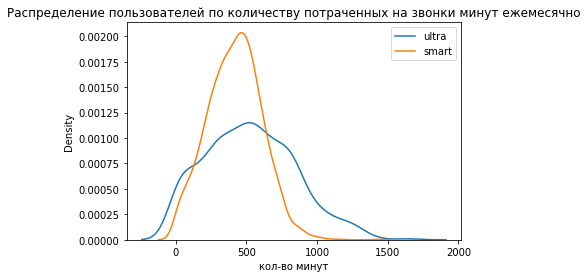

In [30]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=FutureWarning)
    ax = sns.distplot(svod_table.loc[svod_table['tariff'] == 'ultra']['minutes_called'], hist=False)
    sns.distplot(svod_table.loc[svod_table['tariff'] == 'smart']['minutes_called'], hist=False)
    ax.set_title('Распределение пользователей по количеству потраченных на звонки минут ежемесячно')
    ax.set_xlabel('кол-во минут')
    ax.legend(['ultra', 'smart'])

Для обоих тарифов характерно нормальное распределение, однако разброс в количестве израсходованных минут разговора среди пользователей тарифа `ultra` больше, чем у пользователей другого тарифа.

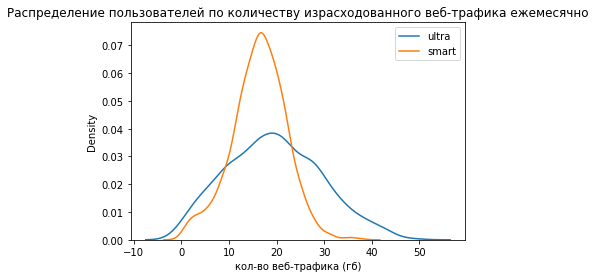

In [31]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=FutureWarning)
    ax = sns.distplot(svod_table.loc[svod_table['tariff'] == 'ultra']['gb_used'], hist=False)
    sns.distplot(svod_table.loc[svod_table['tariff'] == 'smart']['gb_used'], hist=False)
    ax.set_title('Распределение пользователей по количеству израсходованного веб-трафика ежемесячно')
    ax.set_xlabel('кол-во веб-трафика (гб)')
    ax.legend(['ultra', 'smart'])

Диаграммы интернет-трафика также нормально распределены для пользователей двух тарифов при большем разбросе значений среди пользователей тарифа `ultra`. 

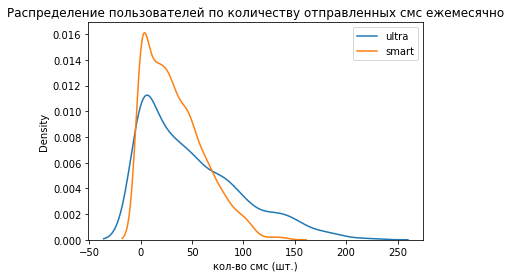

In [32]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=FutureWarning)
    ax = sns.distplot(svod_table.loc[svod_table['tariff'] == 'ultra']['messages_sent'], hist=False)
    sns.distplot(svod_table.loc[svod_table['tariff'] == 'smart']['messages_sent'], hist=False)
    ax.set_title('Распределение пользователей по количеству отправленных смс ежемесячно')
    ax.set_xlabel('кол-во смс (шт.)')
    ax.legend(['ultra', 'smart'])

Оба графика скошены вправо, это говорит о том, что среднее количество отправленных сообщений пользователями больше медианного значения. Отсюда можно сделать вывод, что пользователи обоих тарифов обмену сообщениями предпочитают иные способы связи.

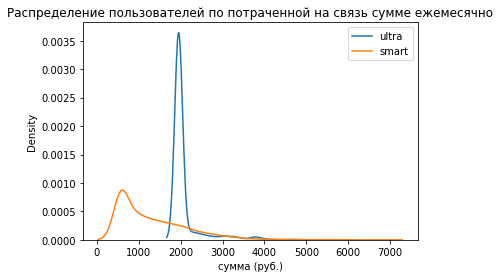

In [33]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=FutureWarning)
    ax = sns.distplot(svod_table.loc[svod_table['tariff'] == 'ultra']['total_cost'], hist=False)
    ax = sns.distplot(svod_table.loc[svod_table['tariff'] == 'smart']['total_cost'], hist=False)
    ax.set_title('Распределение пользователей по потраченной на связь сумме ежемесячно')
    ax.set_xlabel('сумма (руб.)')
    ax.legend(['ultra', 'smart'])

По графику видно, что подавляющее большинство пользователей тарифа `ultra` не выходят за ограничения тарифного плана и оплачивают только стоимость тарифа. Ограничений в тарифе `smart` хватает не всем пользователям, часть из них вынуждена оплачивать услуги сверх абонентской платы.

### Выводы

В среднем пользователи тарифа `ultima` чаще звонят и отправляют смс-сообщения, а также проводят больше времени в интернете, чем пользователи тарифа `smart`. Пользователям `ultima` почти всегда хватает на месяц опций включенных в тарифный план, в то время как пользователи `smart` часто выходят за тарифные ограничения и платят сверх абонентской платы (в среднем 1290 рублей в месяц при абонентской плате в 550 рублей). Стоит также отметить, что пользователи обоих тарифов редко используют смс-сообщения в качестве средства общения.

## Проверка гипотез

Сформируем нулевую гипотезу: средняя выручка пользователей тарифов `ultra` и `smart` равны. Тогда альтернативная гипотеза будет звучать так: средняя выручка пользователей тарифов `ultra` и `smart` различаются. Для проверки гипотезы сравним среднюю выручку генеральных совокупностей тарифов с помощью метода `ttest_ind`, т.к. выборки разного размера, а так же есть сомнения, что дисперсии у совокупностей одинаковые, укажем значение параметра `equal_var` = false. Значение уровня статистической значимости зададим равной 5%. 

In [34]:
ultra_cost = svod_table.loc[svod_table['tariff'] == 'ultra', 'total_cost']
smart_cost = svod_table.loc[svod_table['tariff'] == 'smart', 'total_cost']

alpha = 0.05

results = st.ttest_ind(ultra_cost, smart_cost, equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 4.2606313931076085e-250
Отвергаем нулевую гипотезу


Первую гипотезу, о том, что средняя выручка пользователей двух тарифов равна, следует отвергнуть.

Перейдем к проверке второй гипотезы. Она звучит следующим образом: средняя выручка пользователей из Москвы равна средней выручке пользователей из других регионов. Соответствующая ей альтернативная гипотеза выглядит так: средняя выручка пользователей из Москвы и других регионов различается. Для проверки гипотезы воспользуемся методом `ttest_ind`. Уровень значимости определим 5%.

In [35]:
moscow_cost = svod_table.loc[svod_table['city'] == 'Москва', 'total_cost']
region_cost = svod_table.loc[svod_table['city'] != 'Москва', 'total_cost']

alpha = 0.05

results = st.ttest_ind(moscow_cost, region_cost, equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5257376663729298
Не получилось отвергнуть нулевую гипотезу


Полученное значение p-value говорит о том, что вероятность получить такое различие случайно почти 53%. Это явно слишком большая вероятность, чтобы делать вывод о значимом различии между средней выручкой пользователей из Москвы и других регионов.

### Выводы

С помощью t-теста мы проверили две гипотезы. Первую гипотезу о равенстве средней выручки пользователей тарифов `ultra` и `smart` мы отвергли, вторую гипотезу о равенстве средней выручки пользователей из Москвы и других регионов отвергать не стали. Вероятность получить такое различие случайно составляет более 50%.

## Общий вывод

В ходе исследования были изучены данные о поведении пользователей тарифов `ultra` и `smart`. В среднем пользователи первого тарифа чаще звонят, отправляют больше смс-сообщений и дольше сидят в интернете, чем пользователи тарифа `smart`. Однако большее потребление тарифных опций пользователями `ultima` почти всегда покрывается планом тарифа, в то время как пользователям `smart` часто не хватает включенных в тариф опций, из-за чего приходится платить сверх абонентской платы. В среднем пользователи тарифа `ultima` тратят 2070 рублей в месяц, пользователи тарифа `smart`: 1290 рублей.

Была отвергнута гипотеза о равенстве средней выручки пользователей двух тарифов. Гипотезу о равенстве средней выручки пользователей из Москвы и пользователей из других регионов отвергать не стали из-за высокой вероятности получить такое различие случайно.

Таким образом, можно сделать вывод о том, что тариф `ultra` приносит больше денег компании, а также удовлетворяет большую часть клиентов включенными в него опциями. Результаты исследования следует учесть при планировании рекламного бюджета.